<a href="https://colab.research.google.com/github/Elman295/Self_driving_car/blob/main/traffic_signs_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
with open("drive/MyDrive/traffic_sign/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("drive/MyDrive/traffic_sign/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("drive/MyDrive/traffic_sign/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:


x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']


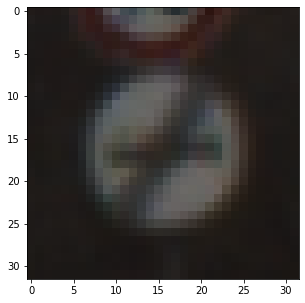

In [12]:
plt.figure(figsize = (5,5))

plt.imshow(x_train[i])
  
plt.show()

In [13]:
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [14]:
x_train = x_train / 255.0
x_test = x_test/255.0
x_validation = x_validation/255.0

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (32,32,3)),
    tf.keras.layers.Conv2D(filters =32, kernel_size = (3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    tf.keras.layers.MaxPool2D(),




    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 128, activation = "relu"),
    tf.keras.layers.Dense(units = 43, activation = "softmax")



])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [17]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [18]:
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = ["accuracy"]
)

In [19]:
history = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1088/1088 [==============================] - 12s 4ms/step - loss: 0.9368 - accuracy: 0.7488
Epoch 2/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.1361 - accuracy: 0.9644
Epoch 3/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0738 - accuracy: 0.9815
Epoch 4/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0476 - accuracy: 0.9878
Epoch 5/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0365 - accuracy: 0.9903
Epoch 6/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0251 - accuracy: 0.9932
Epoch 7/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0223 - accuracy: 0.9943
Epoch 8/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0185 - accuracy: 0.9950
Epoch 9/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0199 - accuracy: 0.9939
Epoch 10/10
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0077 - accura

In [20]:
model.evaluate(x_test, y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.5171 - accuracy: 0.9344


[0.5171129107475281, 0.9344418048858643]

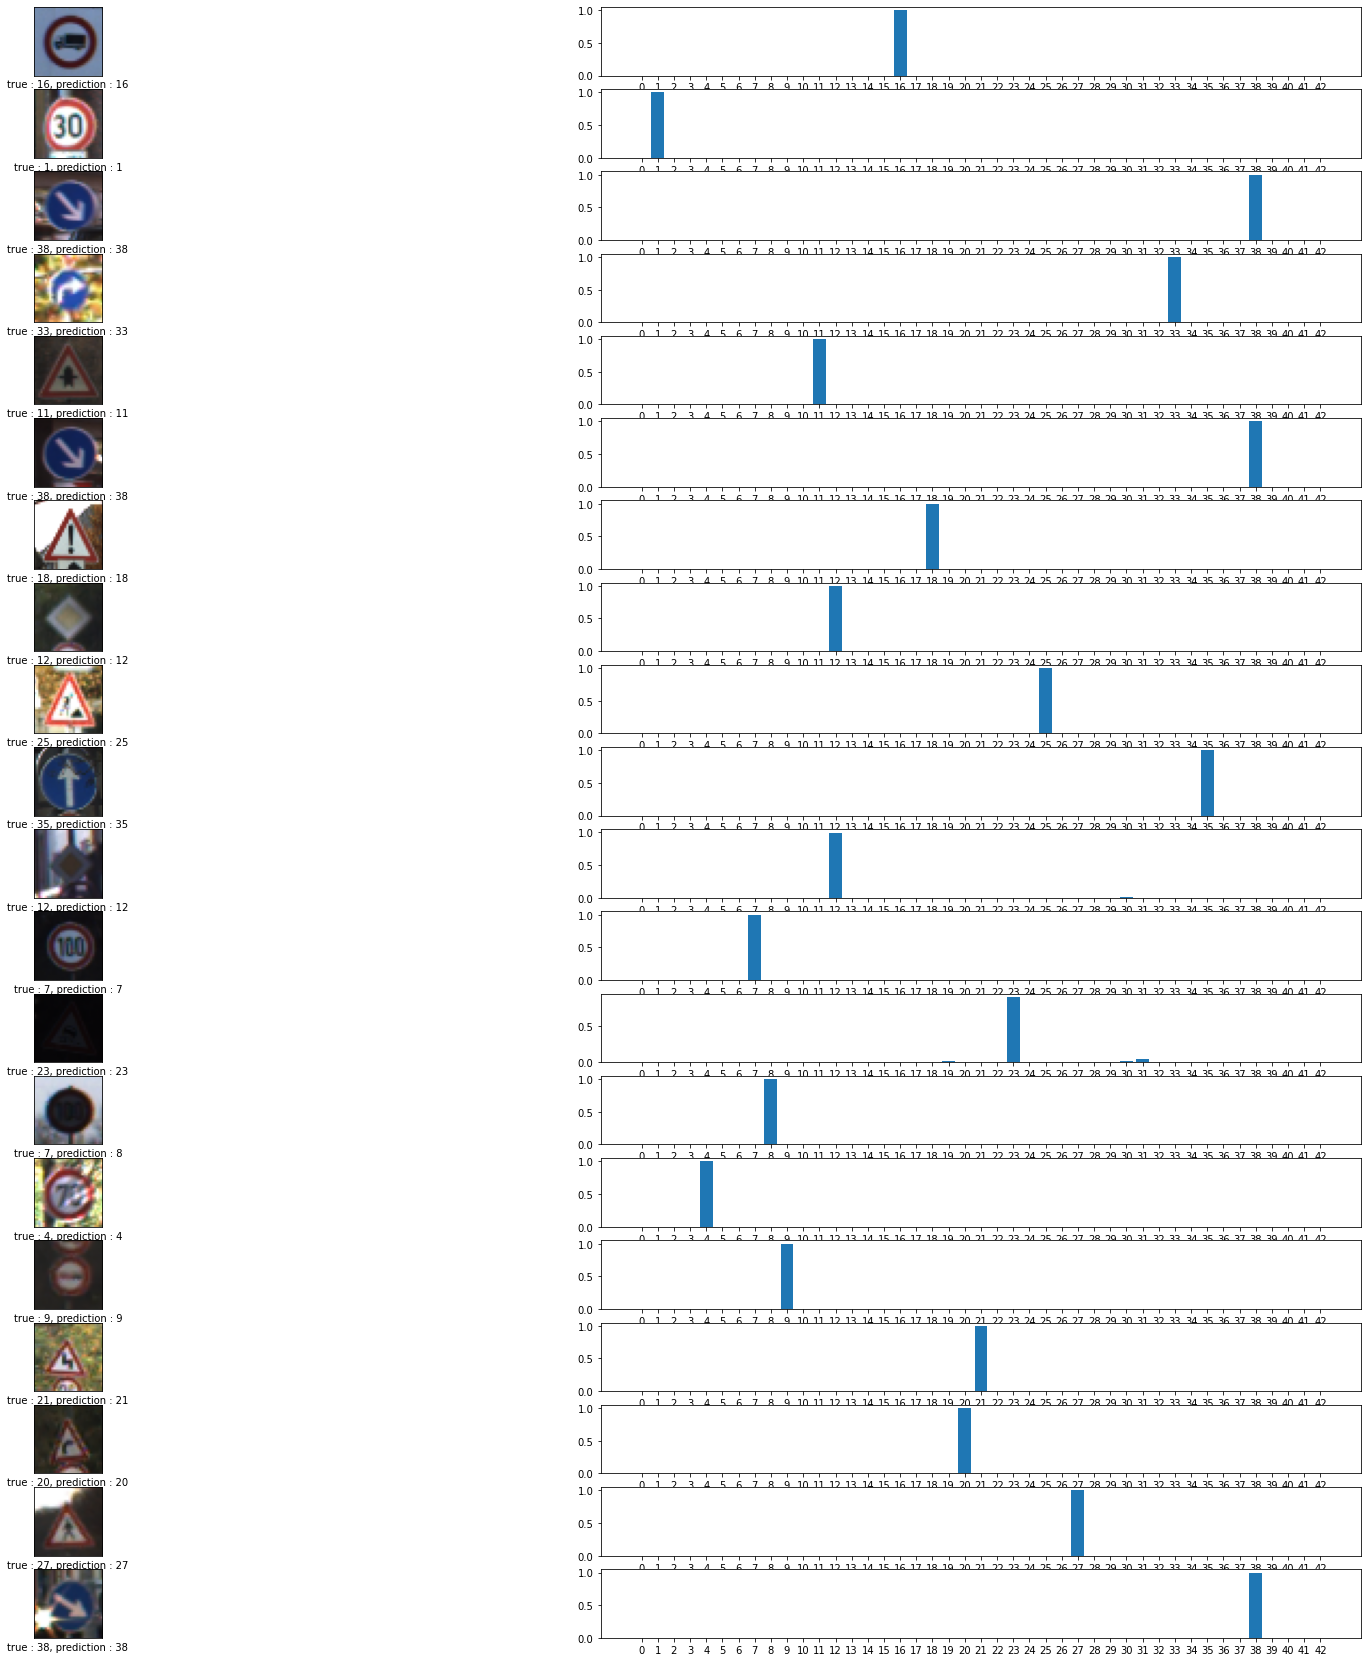

In [22]:
prediction = model(x_test)
plt.figure(figsize = (30,30))
for i in range(20):
  plt.subplot(20,2,2*i+1)
  plt.imshow(x_test[i])
  plt.xlabel(f"true : {y_test[i]}, prediction : {np.argmax(prediction[i])}")
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.subplot(20,2,2*i+2)
  plt.bar(range(43),prediction[i])
  plt.xticks(range(43))

plt.show()

In [23]:
model.save("model.h5}")